In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)
import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
###
from sklearn.svm import SVC, SVR # 비선형 (분류, 회귀)
from sklearn.svm import LinearSVC, LinearSVR # 선형 (분류, 회귀)
### 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris, load_boston, load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
import warnings
warnings.filterwarnings('ignore')

- SVM은 두 범주 사이의 거리(margin)를 최대화 하는 경계면을 찾는 기법
- SVM only uses Support Vector for prediction -> 많은 데이터 필요없음

#  1. 특징

- 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
- 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
- 서보프 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
- 관련 클래스
    - 회귀, 분류: SVR, SVC
    - 선형, 비선형(커널): LinearSCV, LinearSVR

# 2. 커널 기법

In [7]:
from sklearn.datasets import make_blobs

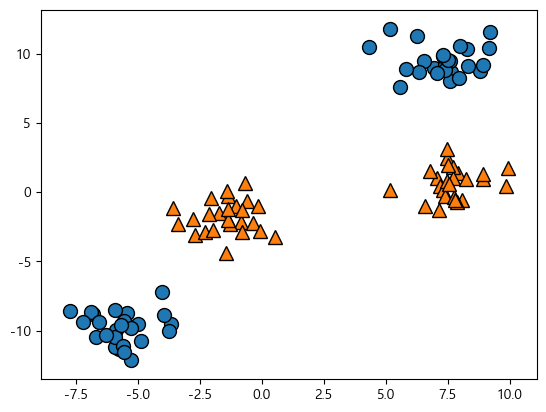

In [9]:
X, y= make_blobs(random_state=8, centers=4)
y= y%2
mglearn.discrete_scatter(X[:,0], X[:,1], y)

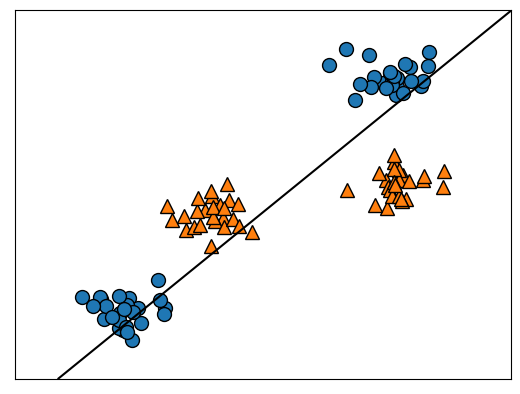

In [12]:
linear_svm= LinearSVC().fit(X,y)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

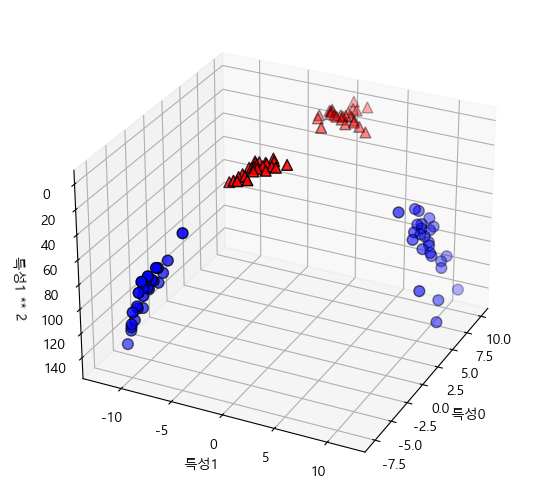

In [13]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

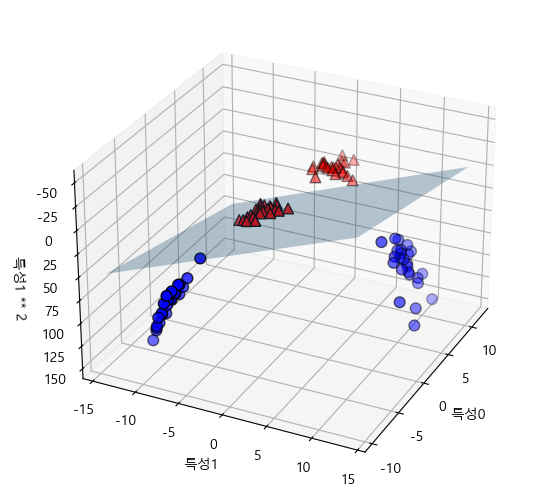

In [15]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

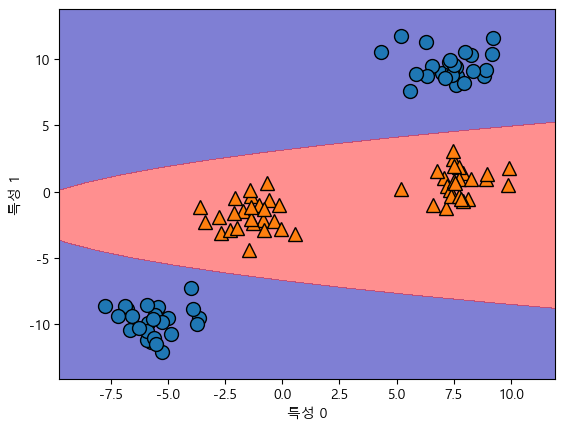

In [16]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
# 하이퍼파라미터 정리
# KNN : n-neighbor
# 선형회귀(lasso, ridge) : alpha
# 로지스틱 회귀: c
# DecisionTree: max-depth, min-~
# RandomForest: n-estimator

# 3. 하이퍼 파라미터 
- cost
    - decision boundary와 마진의 간격을 어느 정도로 할 것인지를 결정
    - cost가 작을수록 마진이 넓어진다.
    
- gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을수록 영향을 끼치는 범위가 넓어진다.

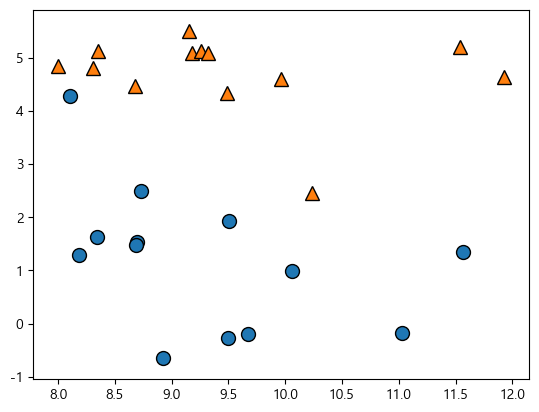

In [18]:
X, y= mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:,0], X[:,1], y)

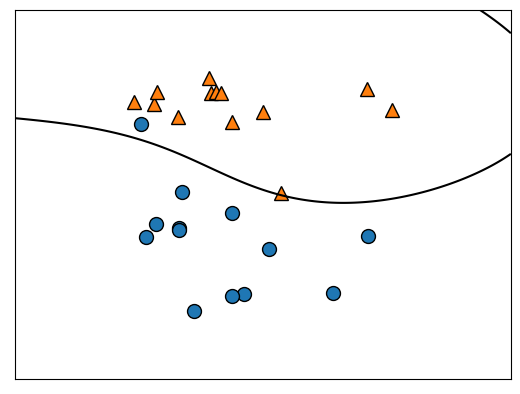

In [20]:
# ?SVC
svm= SVC(kernel= 'rbf', C=10, gamma=0.1).fit(X, y)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [23]:
sv=svm.support_vectors_

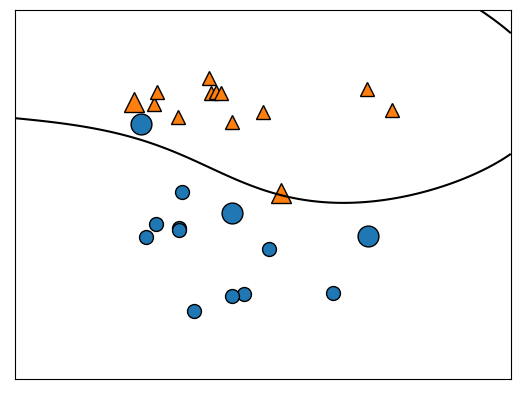

In [24]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

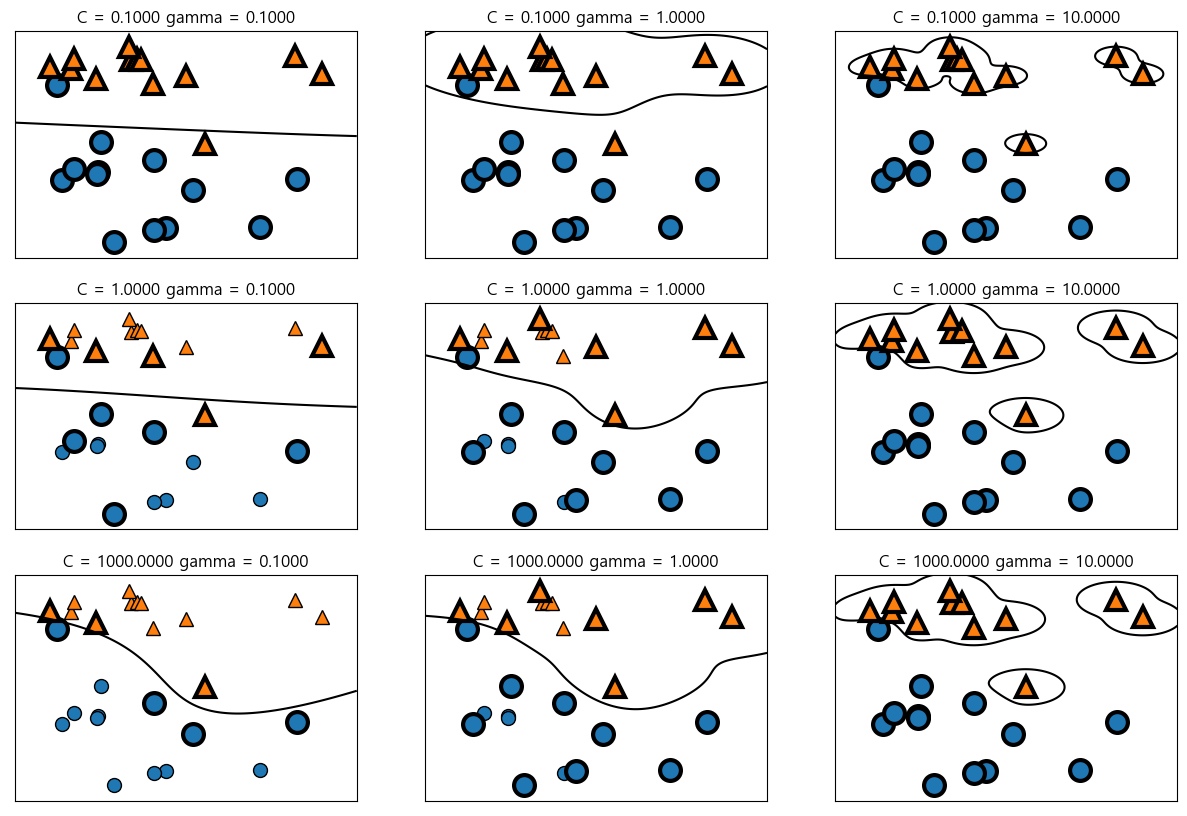

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

# 4. SVM 클래스 사용법
## (1) 회귀 모델과 분류 모델
- 회귀는 커널에 따라 결과가 극과극, 분류는 예민하지 않음
- 정규화에 예민
### 1) 회귀 모델

In [42]:
from sklearn.datasets import fetch_openml
boston= fetch_openml(name= 'boston', version=1)

X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, random_state=123)

In [31]:
# X, y= fetch_california_housing(return_X_y=True)
# X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [43]:
model= SVR() # kernel='rvm'
model.fit(X_train, y_train)

SVR()

In [44]:
print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.21772837063748762
테스트 결과: 0.13544178468518187


### 2) 분류 모델

In [35]:
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [38]:
model= SVC()
model.fit(X_train, y_train)

SVC()

In [39]:
print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


## (2) 커널 기법
defualt= 'svm'. 'poly', 'linear', 'rbf'
- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, rb(Radial Basis Function) 등 다양한 커널기법을 지원

### 1) 회귀 모델

In [31]:
# X, y= fetch_california_housing(return_X_y=True)
# X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [ ]:
from sklearn.datasets import fetch_openml
boston= fetch_openml(name= 'boston', version=1)

X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, random_state=123)

In [45]:
model= SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [46]:
print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.7155066205123104
테스트 결과: 0.6380398541381507


### 2) 분류 모델

In [47]:
X, y= load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [49]:
model= SVC(kernel= 'linear')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.960093896713615
테스트 결과: 0.986013986013986


In [50]:
model= SVC(kernel= 'rbf')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


In [51]:
model= SVC(kernel= 'poly')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


## (3) 하이퍼 파라미터 튜닝

In [52]:
X, y= load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [53]:
model= SVC(kernel= 'poly', C= 0.1, gamma= 'auto')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.971830985915493
테스트 결과: 0.986013986013986


In [57]:
model= SVC(kernel= 'rbf', C= 100, gamma= 'scale')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.9295774647887324
테스트 결과: 0.958041958041958


### (4) 정규화, 표준화
SVM은 정규화 여부에 따라 결과 매우 다름

In [58]:
X, y= load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [60]:
#### 표준화

scaler= StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)

In [61]:
model= SVC(kernel= 'rbf')
model.fit(X_train_std, y_train)

print('학습 결과:', model.score(X_train_std, y_train))
print('테스트 결과:', model.score(X_test_std, y_test))

학습 결과: 0.9835680751173709
테스트 결과: 0.986013986013986


In [62]:
#### 정규화

scaler=MinMaxScaler()
X_train_mm= scaler.fit_transform(X_train)
X_test_mm= scaler.transform(X_test)

In [64]:
model= SVC(kernel= 'rbf')
model.fit(X_train_mm, y_train)

print('학습 결과:', model.score(X_train_mm, y_train))
print('테스트 결과:', model.score(X_test_mm, y_test))

학습 결과: 0.9812206572769953
테스트 결과: 0.986013986013986


### (5) 선형 모델과의 비교

In [ ]:
from sklearn.datasets import fetch_openml
boston= fetch_openml(name= 'boston', version=1)

X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, random_state=123)

In [65]:
model= LinearSVR(max_iter=100000, random_state=42).fit(X_train, y_train)

In [66]:
print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.5317515555079237
테스트 결과: 0.46751295846683427


#### 당뇨병 샘플

In [80]:
from sklearn.datasets import load_diabetes

X, y= load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123, test_size=0.2)

In [84]:
scaler=MinMaxScaler()
X_train_mm= scaler.fit_transform(X_train)
X_test_mm= scaler.transform(X_test)

model= LinearSVR(max_iter=100000, C=0.01, random_state=42).fit(X_train_mm, y_train)

In [85]:
print('학습 결과:', model.score(X_train_mm, y_train))
print('테스트 결과:', model.score(X_test_mm, y_test))

학습 결과: -3.4556731652278208
테스트 결과: -3.13518460026766


In [81]:
scaler=MinMaxScaler()
X_train_mm= scaler.fit_transform(X_train)
X_test_mm= scaler.transform(X_test)

model= SVR(kernel= 'linear', C=100).fit(X_train_mm, y_train)

In [82]:
print('학습 결과:', model.score(X_train_mm, y_train))
print('테스트 결과:', model.score(X_test_mm, y_test))

학습 결과: 0.4942051231496234
테스트 결과: 0.577728931035458


## (6) Pipe Line

In [6]:
from sklearn.pipeline import make_pipeline, Pipeline

### 1) Boston Housing

In [87]:
from sklearn.datasets import fetch_openml
boston= fetch_openml(name= 'boston', version=1)

X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target, random_state=123)

In [89]:
estimator= make_pipeline(StandardScaler(), SVR(kernel='linear')) # 알아서 표준화하고 학습

cross_validate(estimator=estimator, X=X_train, y= y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


{'fit_time': array([0.00997138, 0.00997138, 0.00997138, 0.00997329, 0.00897789]),
 'score_time': array([0.00199962, 0.00199962, 0.00199962, 0.00199437, 0.00299144]),
 'test_score': array([0.67045643, 0.83334124, 0.69370893, 0.74817853, 0.61467997])}

In [90]:
estimator.steps

[('standardscaler', StandardScaler()), ('svr', SVR(kernel='linear'))]

In [92]:
estimator.fit(X_train, y_train)
print('학습 결과:', estimator.score(X_train, y_train))
print('테스트 결과:', estimator.score(X_test, y_test))

학습 결과: 0.7161408576652015
테스트 결과: 0.640254094777322


In [249]:
pipe= Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

In [250]:
pipe.steps

[('scaler', StandardScaler()), ('model', SVR(kernel='linear'))]

In [251]:
pipe.fit(X_train, y_train)
print('학습 결과:', pipe.score(X_train, y_train))
print('테스트 결과:', pipe.score(X_test, y_test))

학습 결과: 0.7497121938380804
테스트 결과: 0.7935585447112335


In [102]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01],
        'model__epsilon':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [103]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}


In [104]:
model= SVR(kernel='linear', C=1.0, gamma='scale', epsilon=1.0)
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

학습 결과: 0.7233760661973168
테스트 결과: 0.6438340317593632


### 2) Breast Cancer Sample

In [238]:
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [258]:
pipe= Pipeline([('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])

In [259]:
pipe.fit(X_train, y_train)
print('학습 결과:', pipe.score(X_train, y_train))
print('테스트 결과:', pipe.score(X_test, y_test))

# MinMaxScaler: 0.97 / 0.98
# StandardScaler: 0.99 / 0.98

학습 결과: 0.9765258215962441
테스트 결과: 0.986013986013986


In [260]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [261]:
print(gs.best_estimator_)
print(gs.best_params_)
# MinMaxScaler: ('model', SVC(kernel='linear'))]) {'model__C': 1.0, 'model__gamma': 'scale'}
# StandardScaler: ('model', SVC(C=0.1, kernel='linear'))]) {'model__C': 0.1, 'model__gamma': 'scale'}

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [263]:
model= SVC(kernel='linear', C=1, gamma='scale')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

# MinMaxScaler: 0.96 / 0.98
# StandardScaler: 0.98 / 0.98

학습 결과: 0.960093896713615
테스트 결과: 0.986013986013986


### 3) Iris Sample

In [264]:
X, y= load_iris(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [270]:
pipe= Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [271]:
pipe.fit(X_train, y_train)
print('학습 결과:', pipe.score(X_train, y_train))
print('테스트 결과:', pipe.score(X_test, y_test))

# MinMaxScaler: 0.98 / 0.92
# StandardScaler: 0.99 / 0.97

학습 결과: 0.9910714285714286
테스트 결과: 0.9736842105263158


In [272]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [273]:
print(gs.best_estimator_)
print(gs.best_params_)

# MinMaxScaler:  ('model', SVC(kernel='linear'))]) {'model__C': 1.0, 'model__gamma': 'scale'}
# StandardScaler: ('model', SVC(C=0.1, kernel='linear'))]) {'model__C': 0.1, 'model__gamma': 'scale'}

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}


In [275]:
model= SVC(kernel='linear', C=0.1, gamma='scale')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

# MinMaxScaler: 0.99 / 0.94
# StandardScaler: 0.97 / 0.92

학습 결과: 0.9732142857142857
테스트 결과: 0.9210526315789473


### 4) Wine Sample

In [276]:
wine= pd.read_csv('data/wine.csv')

In [277]:
X= wine[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y= wine['quality']

In [278]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=123)

In [284]:
pipe= Pipeline([('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])

In [285]:
pipe.fit(X_train, y_train)
print('학습 결과:', pipe.score(X_train, y_train))
print('테스트 결과:', pipe.score(X_test, y_test))

# MinMaxScaler: 0.59 / 0.55
# StandardScaler: 0.59 / 0.54

학습 결과: 0.5938281901584654
테스트 결과: 0.5525


In [286]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [287]:
print(gs.best_estimator_)
print(gs.best_params_)

# MinMaxScaler:  ('model', SVC(kernel='linear'))]) {'model__C': 1.0, 'model__gamma': 'scale'}
# StandardScaler: ('model', SVC(C=0.1, kernel='linear'))]) {'model__C': 0.1, 'model__gamma': 'scale'}

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [289]:
model= SVC(kernel='linear', C=1, gamma='scale')
model.fit(X_train, y_train)

print('학습 결과:', model.score(X_train, y_train))
print('테스트 결과:', model.score(X_test, y_test))

# MinMaxScaler: 0.59 / 0.54
# StandardScaler: 0.58 / 0.55

학습 결과: 0.5988323603002502
테스트 결과: 0.5425


### 5) 여행자 보험 Sample

In [7]:
data = pd.read_csv('data/TravelInsurance.csv')
data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,1,Government Sector,Yes,No,No,0
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No,0
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No,1
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No,0
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,Private Sector/Self Employed,Yes,Yes,Yes,1
1983,28,1750000,5,1,Private Sector/Self Employed,Yes,No,Yes,0
1984,28,1150000,6,1,Private Sector/Self Employed,Yes,No,No,0
1985,34,1000000,6,0,Private Sector/Self Employed,Yes,Yes,Yes,1


In [8]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.3)

In [10]:
train_num = X_train[X_train.columns[0:4]]

In [11]:
train_cat = X_train[X_train.columns[4:]]

In [12]:
train_cat = pd.get_dummies(train_cat)

In [13]:
test_num = X_test[X_test.columns[0:4]]

In [14]:
test_cat = X_test[X_test.columns[4:]]

In [15]:
test_cat = pd.get_dummies(test_cat)

In [16]:
train_final = pd.concat([pd.DataFrame(train_num), train_cat], axis=1, ignore_index=True)
test_final = pd.concat([pd.DataFrame(test_num), test_cat], axis=1, ignore_index=True)

In [17]:
# std = StandardScaler()
# std.fit(train_num)
# train_scaled = std.transform(train_num)
# test_scaled = std.transform(test_num)

In [251]:
# train_final = pd.concat([pd.DataFrame(train_scaled), train_cat], axis=1, ignore_index=True)
# test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)

In [304]:
# estimator= make_pipeline(StandardScaler(), SVR(kernel='rbf')) # 알아서 표준화하고 학습  'rbf'. 'poly', 'linear', 'sigmoid'

# cross_validate(estimator=estimator, X=train_final, y= y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.06874943, 0.07978725, 0.08776498, 0.0867672 , 0.08976007]),
 'score_time': array([0.03091717, 0.02293801, 0.02393579, 0.02593064, 0.02692747]),
 'test_score': array([0.40113924, 0.23692683, 0.20274845, 0.28409239, 0.36192241])}

In [22]:
pipe= Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [23]:
pipe.fit(train_final, y_train)
print('학습 결과:', pipe.score(train_final, y_train))
print('테스트 결과:', pipe.score(test_final, y_test))

# MinMaxScaler: 0.75 / 0.73
# StandardScaler: 0.75 / 0.73

학습 결과: 0.7597122302158273
테스트 결과: 0.7319932998324958


In [24]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(train_final, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [25]:
print(gs.best_estimator_)
print(gs.best_params_)

# MinMaxScaler:  ('model', SVC(kernel='linear'))]) {'model__C': 1.0, 'model__gamma': 'scale'}
# StandardScaler: ('model', SVC(C=0.1, kernel='linear'))]) {'model__C': 0.1, 'model__gamma': 'scale'}

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}


In [1]:
model= SVC(kernel='linear', C=1, gamma='scale')
model.fit(train_final, y_train)

print('학습 결과:', model.score(train_final, y_train))
print('테스트 결과:', model.score(test_final, y_test))

# MinMaxScaler: 
# StandardScaler: 

NameError: name 'SVC' is not defined

### 6) 중고자동차 Sample

In [58]:
data= pd.read_csv('data/handed_car.csv')
X= data[data.columns[1:-1]]
y= data[[data.columns[-1]]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CAR_ID        2864 non-null   int64 
 1   year          2864 non-null   int64 
 2   distance      2864 non-null   int64 
 3   sunroof       2864 non-null   int64 
 4   navigation    2864 non-null   int64 
 5   grade         2864 non-null   object
 6   fuel          2864 non-null   object
 7   transmission  2864 non-null   object
 8   price         2864 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 201.5+ KB


In [59]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.3, random_state=42)

In [60]:
train_num= X_train[X_train.columns[0:4]]
train_cat= X_train[X_train.columns[4:]]

In [62]:
train_cat= pd.get_dummies(train_cat)
train_cat= train_cat.reset_index(drop=True)

In [63]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 27.5 KB


In [64]:
test_num= X_test[X_test.columns[0:4]]
test_cat= X_test[X_test.columns[4:]]
test_cat= pd.get_dummies(test_cat)
test_cat=test_cat.reset_index(drop=True)

In [65]:
train_cat1, test_cat1= train_cat.align(test_cat, join='outer', axis=1)

In [66]:
train_cat1.info()
test_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 27.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860

In [69]:
minmax= MinMaxScaler()
minmax.fit(train_num)

train_scaled= minmax.transform(train_num)
test_scaled= minmax.transform(test_num)

In [70]:
train_final= pd.concat([pd.DataFrame(train_scaled), train_cat], axis=1, ignore_index=True)
test_final= pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)

In [71]:
train_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.491642,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0.666667,0.031609,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0.000000,0.137696,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0.333333,0.275516,1.0,1.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,0.000000,0.284913,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.333333,0.154224,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2000,0.000000,0.481352,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2001,0.000000,0.418032,1.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2002,0.333333,0.496777,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [95]:
pipe= Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

In [96]:
pipe.fit(train_final, y_train)
print('학습 결과:', pipe.score(train_final, y_train))
print('테스트 결과:', pipe.score(test_final, y_test))

# StandardScaler
# linear: 0.61 / 0.63
# rbf: 0.43 / 0.45
# poly: 0.33 / 0.26
# sigmoid: 0.51 / 0.53

학습 결과: 0.6138457786397444
테스트 결과: 0.6388286068272637


In [97]:
params=[{'model__gamma':['scale','auto'],
        'model__C':[1.0, 0.1, 0.01],
        'model__epsilon':[1.0, 0.1, 0.01]}]

gs= GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, cv=5, verbose=True)
gs.fit(train_final, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [98]:
print(gs.best_estimator_)
print(gs.best_params_)

# StandardScaler:
# MinMaxScaler: 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}


In [99]:
model= SVR(kernel='linear', C=1.0, gamma='scale', epsilon=1.0)
model.fit(train_final, y_train)

print('학습 결과:', model.score(train_final, y_train))
print('테스트 결과:', model.score(test_final, y_test))

# linear: 0.49 / 0.53
# rbf: 
# poly: 
# sigmoid: 0.49 / 0.53

학습 결과: 0.49469219824626487
테스트 결과: 0.5304174991757771


## (7) 농구선수의 포지션 예측

In [134]:
df= pd.read_csv('data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [107]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

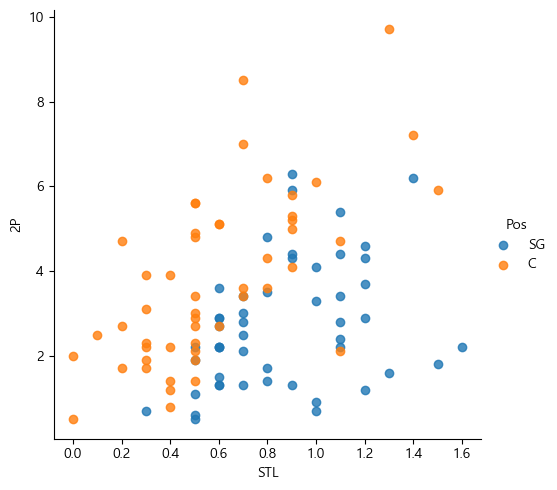

In [108]:
# 특성 중요도 -> DecisionTree
# 산포도
sns.lmplot('STL', '2P', data=df, fit_reg=False, hue='Pos')

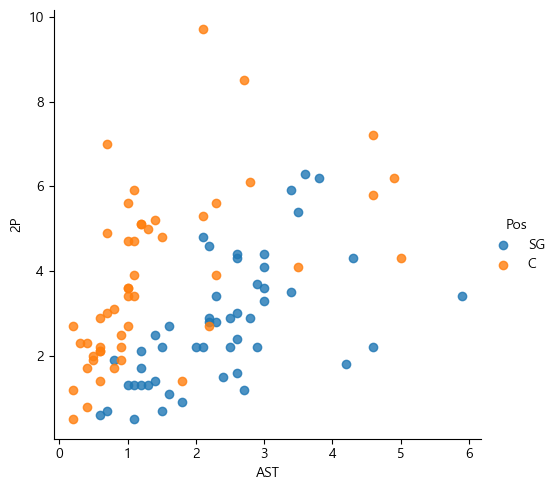

In [109]:
sns.lmplot('AST', '2P', data=df, fit_reg=False, hue='Pos')

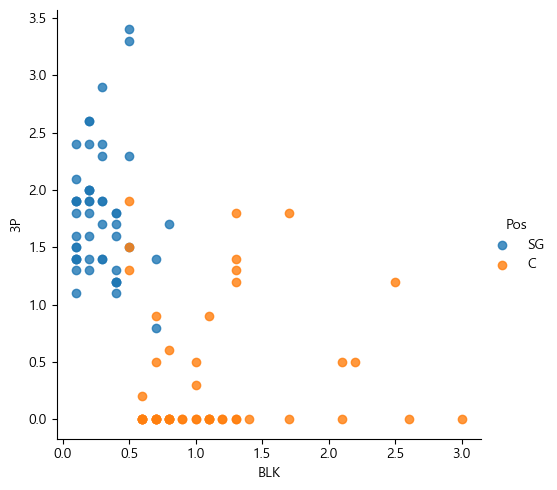

In [110]:
sns.lmplot('BLK', '3P', data=df, fit_reg=False, hue='Pos')

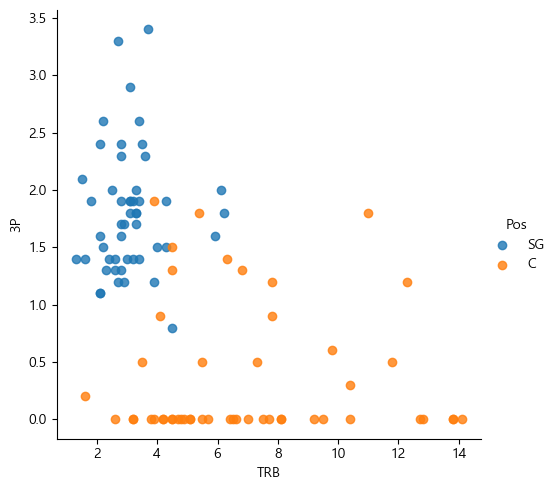

In [113]:
sns.lmplot('TRB', '3P', data=df, fit_reg=False, hue='Pos')

In [116]:
# 3P, TRB, BLK만 사용
df.drop(['2P','AST','STL'], axis=1, inplace=True)

In [117]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [136]:
train, test= train_test_split(df, test_size=0.2)

In [119]:
print(train.shape, test.shape)

(80, 5) (20, 5)


In [137]:
X_train= train[['3P','TRB','BLK', '2P', 'AST', 'STL']]
y_train= train['Pos']
X_test= train[['3P','TRB','BLK', '2P', 'AST', 'STL']]
y_test= train['Pos']

In [138]:
params= [{'kernel':['rbf','poly','sigmoid'],
         'gamma':['scale','auto'],
         'C':[0.01, 0.1, 1, 10, 100, 1000]}]

svm= GridSearchCV(estimator= SVC(), param_grid=params).fit(X_train, y_train)

In [139]:
svm.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

In [140]:
pred= svm.predict(X_test)
print('정확도:', accuracy_score(y_test, pred))
# drop 후: 0.95
# drop 전: 0.9875

정확도: 0.9875


## (8) 손글씨 이미지

In [6]:
def normal(n):
    return round(int(n)/256)

def load_csv(fname):
    labels=[]
    images=[]
    
    f= open(fname)
    for line in f:
        cols= line.split(',')
        if len(cols) < 2:
            continue
        labels.append(int(cols.pop(0)))
        images.append(list(map(normal, cols)))
    f.close()
    return {'y':labels, 'X':images}

In [7]:
train= load_csv('data/mnist/train.csv')
test= load_csv('data/mnist/t10k.csv')

In [8]:
print(train['X'][0]) # 10001개
print(test['X'][0]) # 501개
# 컬럼의 개수 784개(28*28)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
print(train['y'][0])
print(test['y'][0])

5
7


In [10]:
model= SVC().fit(train['X'], train['y'])

In [11]:
pred= model.predict(test['X'])
print('정확도:', accuracy_score(test['y'], pred))

정확도: 0.9540918163672655


In [12]:
print(classification_report(test['y'], pred)) # f1-score

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.95      0.95        55
           3       0.95      0.89      0.92        46
           4       0.96      0.98      0.97        55
           5       0.92      0.94      0.93        50
           6       0.95      0.93      0.94        43
           7       0.92      0.98      0.95        49
           8       0.91      0.97      0.94        40
           9       1.00      0.91      0.95        54

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.95      0.95       501



### Service Launching

In [13]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [15]:
from IPython.display import HTML

In [16]:
HTML(input_form + javascript)

In [19]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
model.predict([image])

array([2])

# 5. 학습 모델 저장
- pickle
- joblib

## (1) pickle
- Serializable: 데이터를 간단하게 쪼개서 전송 (byte)

In [28]:
import pickle

In [33]:
phone= {'tom':'111-1111', 'hong':'222-2222'}
product= ['마우스','키보드']
data=(phone, product)

f=open('data/data1.pkl','wb') # binary 이진수로 저장
pickle.dump(data, f)

f.close()

In [38]:
f= open('data/data1.pkl','rb')

data2= pickle.load(f)
f.close()

print(data2[1][0], data2[0]['hong'])

마우스 222-2222


In [39]:
#### 학습된 데이터 모델 저장 후 불러오기

X, y= load_iris(return_X_y=True)
model= SVC().fit(X, y)

In [40]:
f= open('data/iris_svc.pkl','wb')
pickle.dump(model, f)
f.close()

In [42]:
f= open('data/iris_svc.pkl','rb')
svc= pickle.load(f)
f.close()

svc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## (2) joblib

In [43]:
import joblib

In [44]:
joblib.dump(model, 'data/iris_svc1.pkl')

['data/iris_svc1.pkl']

In [45]:
svc1= joblib.load('data/iris_svc1.pkl')

In [46]:
print(svc1.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
